<h1>Time Series Transformation</h1>

<h2 align="center">Aggregation</h2>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


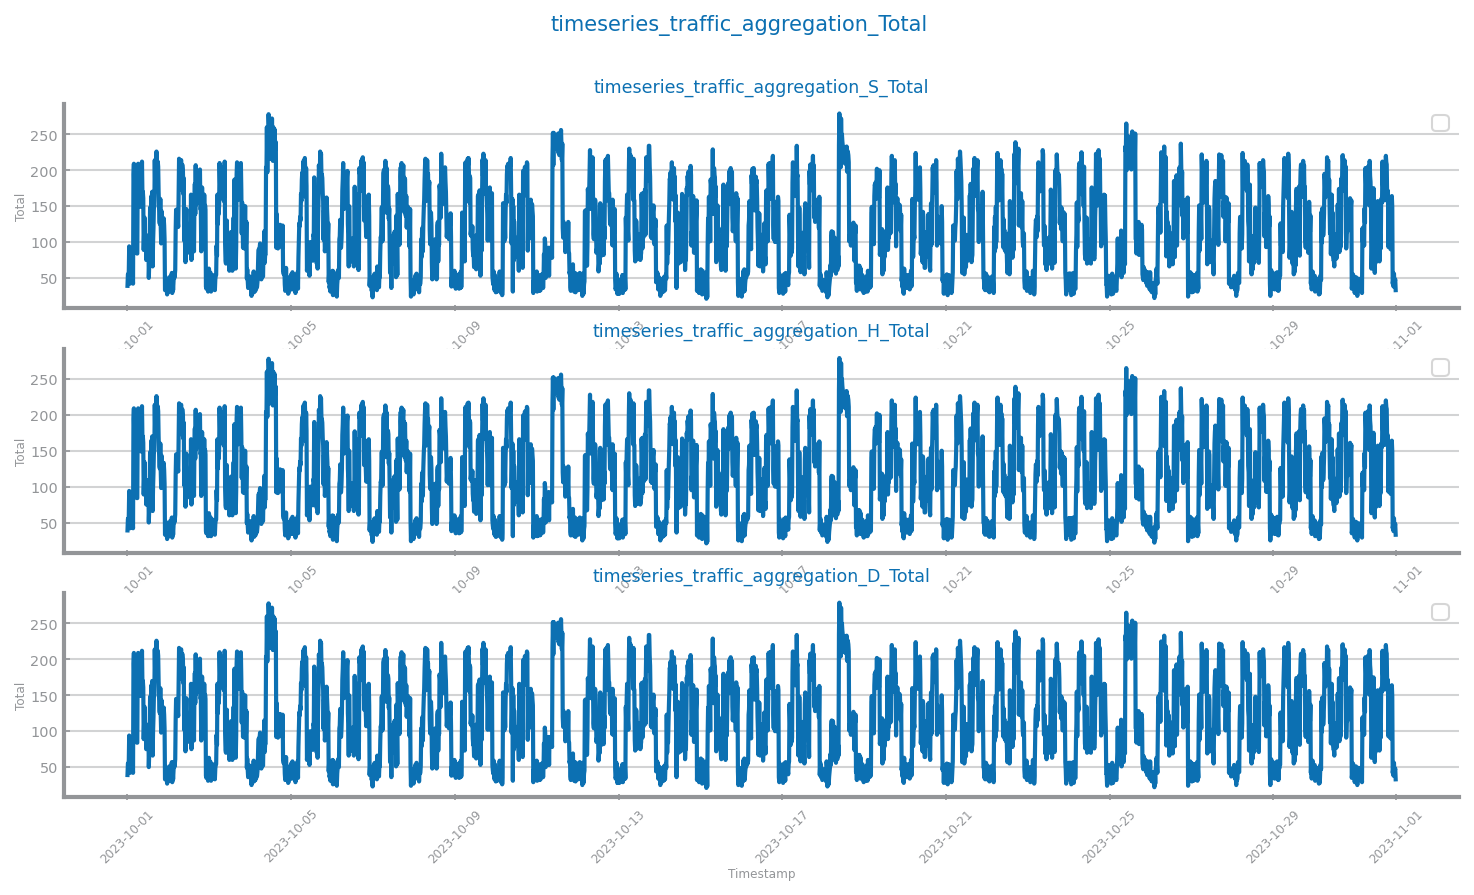

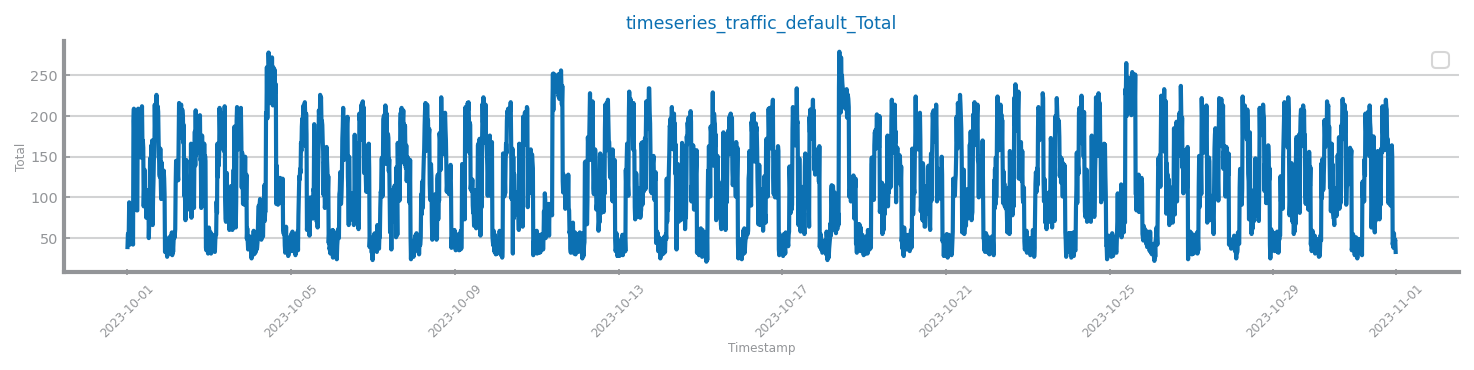

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


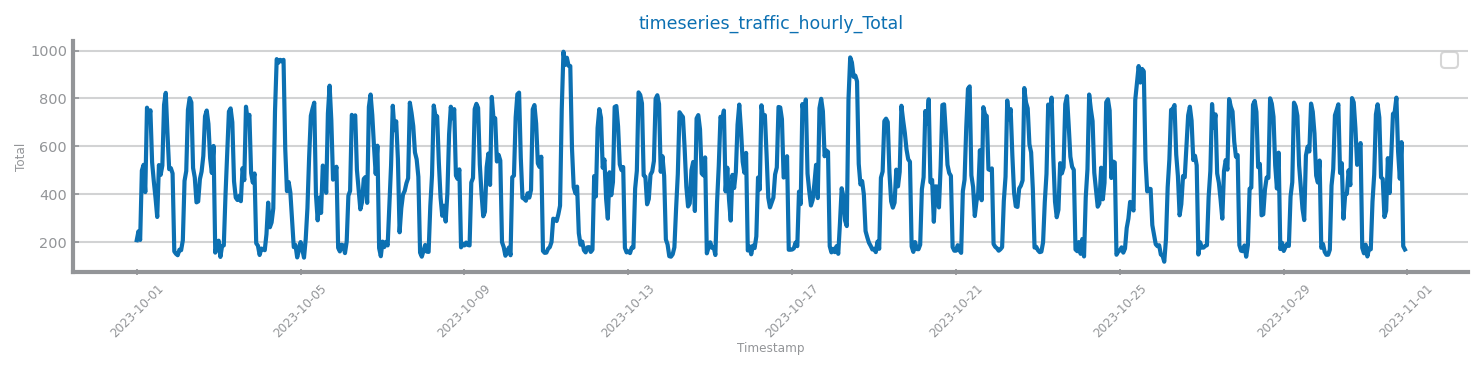

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


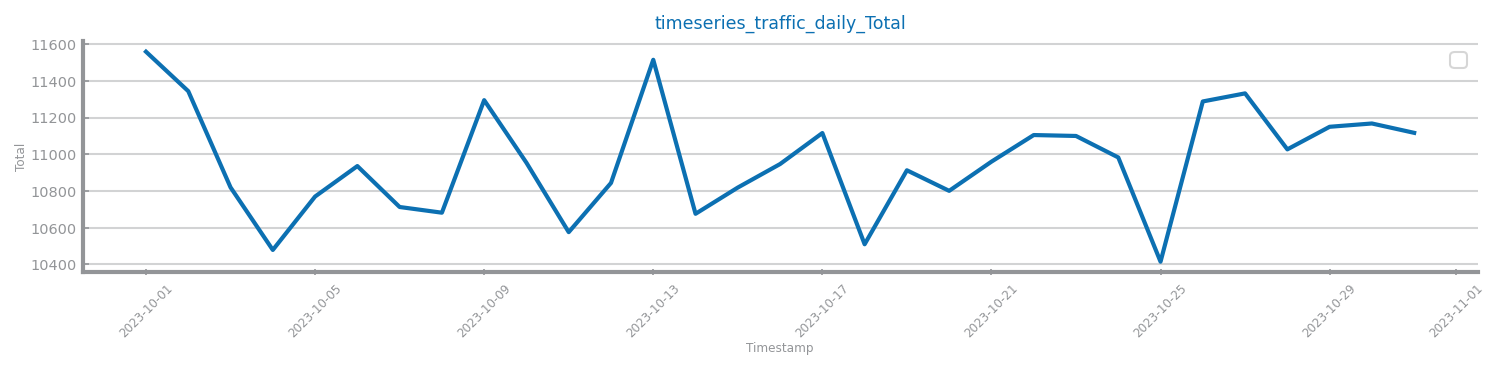

In [16]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from matplotlib.pyplot import subplots

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

granularities=["S", "H", "D"]
fig, axs = subplots(len(granularities), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(granularities)))
fig.suptitle(f"{file_tag}_aggregation_{target}")

series: Series = data[target]
for gran in range(len(granularities)):
    plot_line_chart(
        series.index.to_list(),
        series.to_list(),
        xlabel=series.index.name,
        ylabel=target,
        ax=axs[gran],
        title=f"{file_tag}_aggregation_{granularities[gran]}_{target}",
    )
plt.savefig(f"{file_tag}_aggregation_{target}")

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag}_default_{target}",
)
plt.savefig(f"{file_tag}_default_{target}")
show()
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg: Series = ts_aggregation_by(series, gran_level="H", agg_func="sum")
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag}_hourly_{target}",
)
plt.savefig(f"{file_tag}_hourly_{target}")
show()
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag}_daily_{target}",
)
plt.savefig(f"{file_tag}_daily_{target}")
show()

[ 39  55  55 ... 126 164 152]


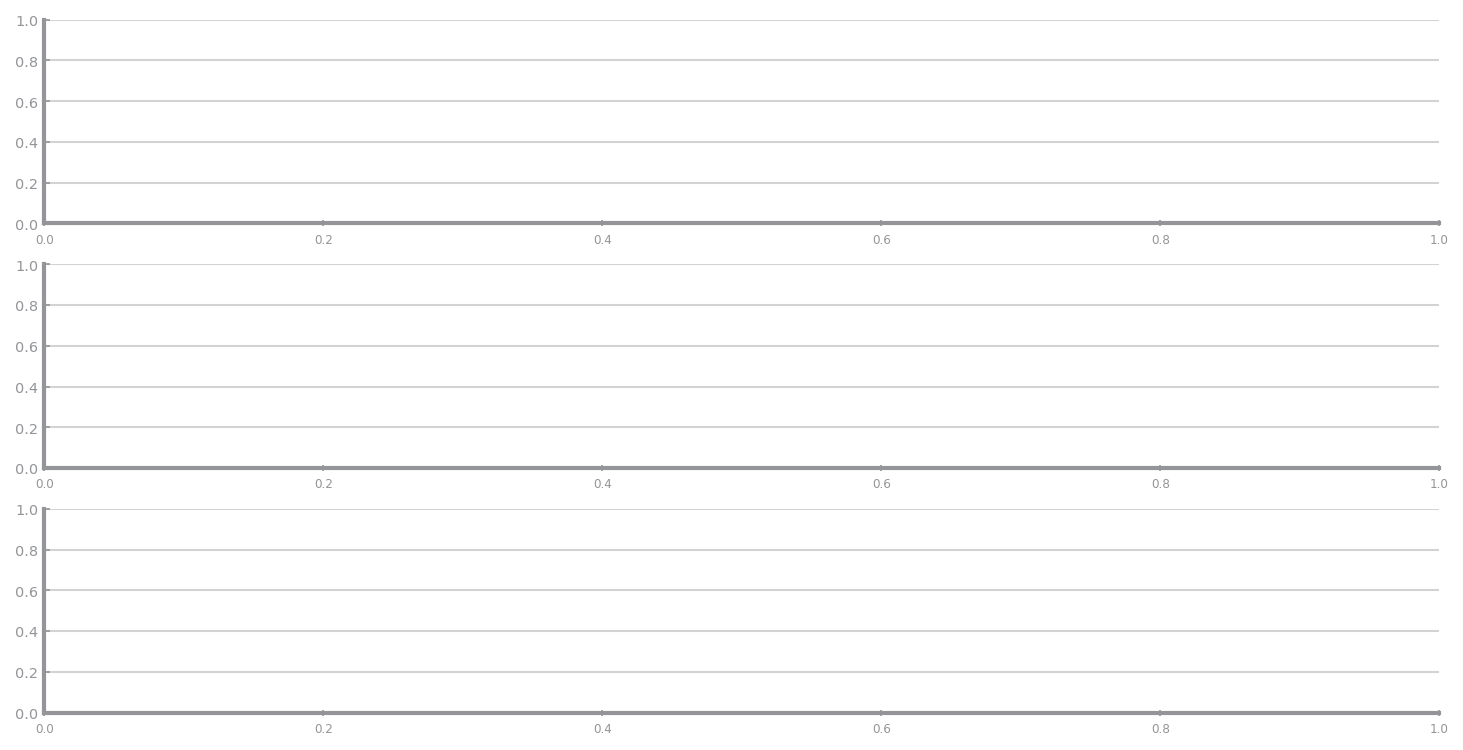

<Figure size 1800x300 with 0 Axes>

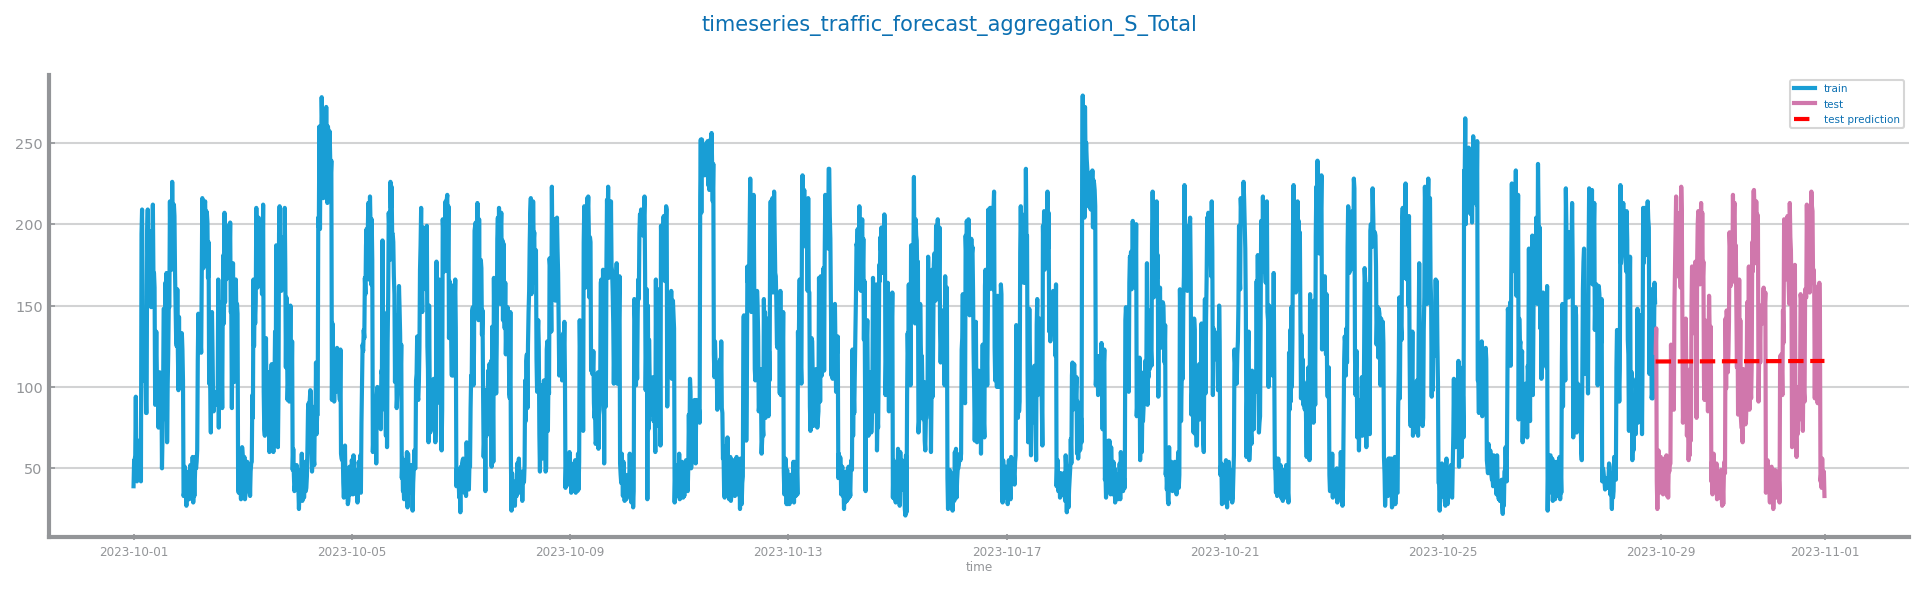

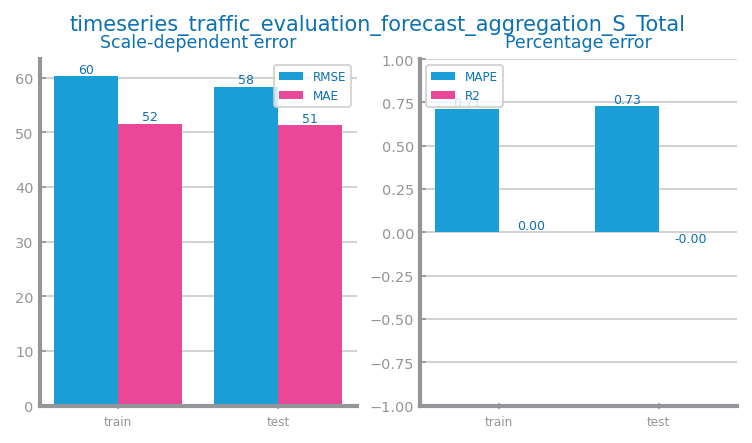

[207 244 208 498 522 408 761 710 750 533 453 384 304 521 480 519 773 823
 653 504 508 486 160 150 144 167 165 206 455 496 752 801 783 509 469 365
 369 462 494 559 725 749 693 549 488 601 155 188 205 137 183 185 396 566
 745 758 700 453 385 375 392 370 508 458 765 708 731 488 448 486 194 184
 145 172 169 165 232 364 261 281 340 745 964 949 961 955 961 589 412 450
 406 293 178 187 135 165 199 168 134 212 341 554 727 757 782 397 290 385
 321 519 496 405 737 853 708 460 476 514 175 160 188 185 153 201 393 413
 731 715 729 501 419 336 366 463 471 363 764 816 730 599 484 602 174 140
 201 178 200 185 350 519 769 667 704 548 240 341 398 413 445 466 782 739
 684 574 545 472 155 138 163 187 159 158 351 479 770 727 725 531 385 309
 351 285 403 650 765 717 755 477 463 503 177 192 185 197 187 185 448 467
 755 777 760 523 402 307 326 512 569 438 806 717 717 536 564 540 199 178
 142 157 176 144 470 477 720 817 824 552 384 380 372 403 385 417 754 772
 695 528 513 556 162 154 155 171 178 199 297 293 28

<Figure size 1800x300 with 0 Axes>

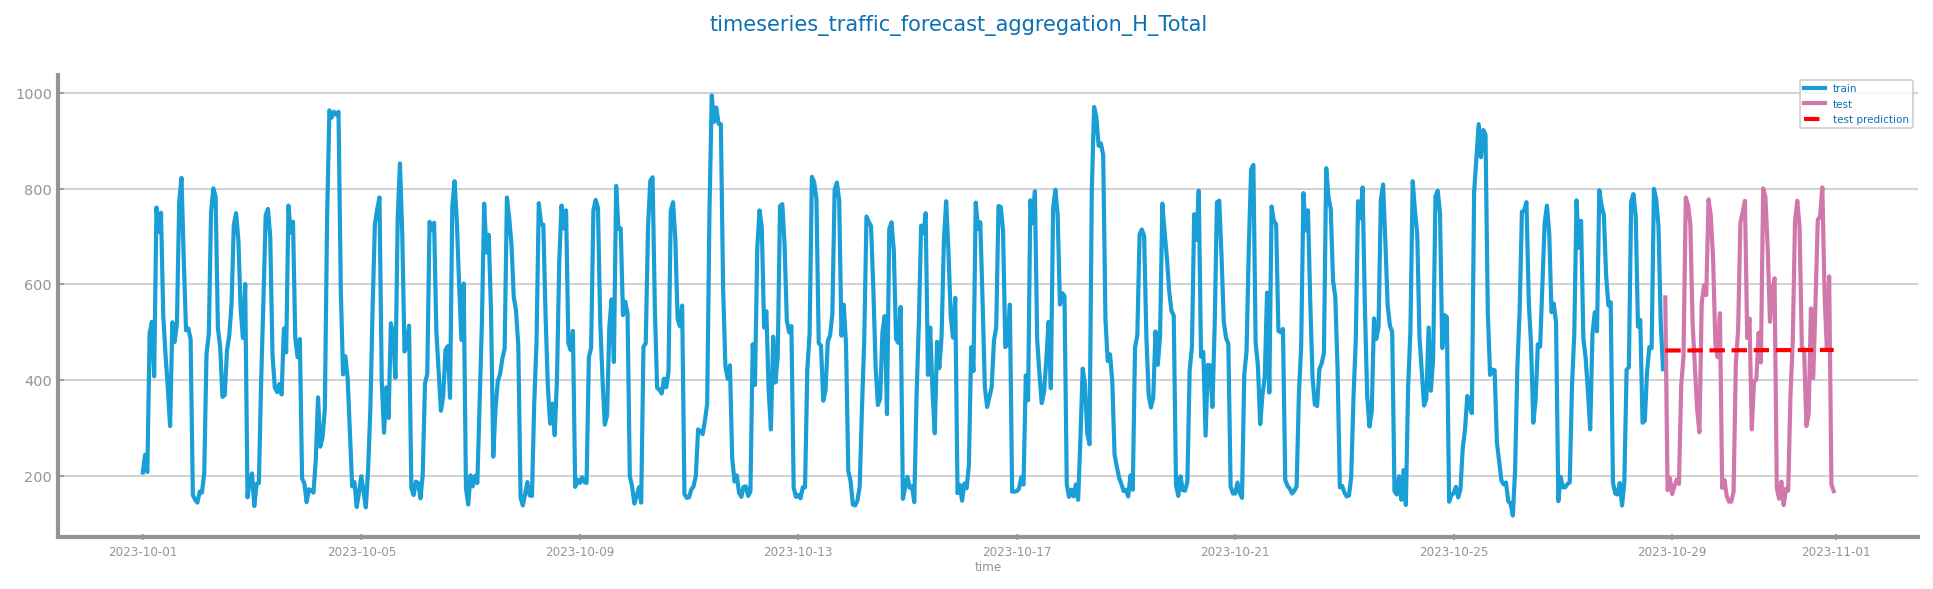

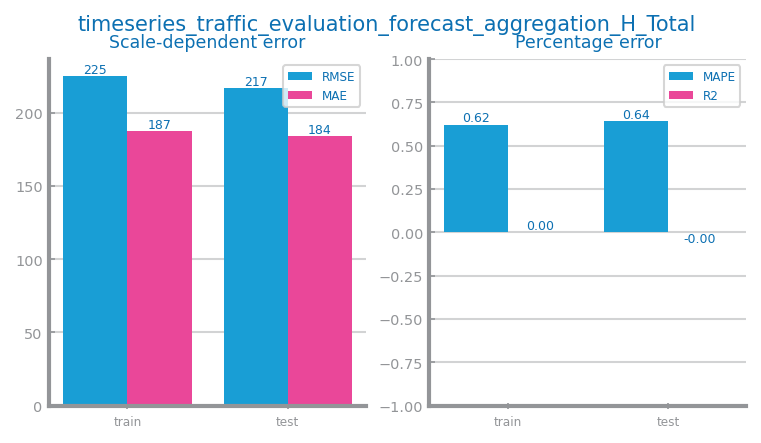

[11559 11344 10820 10479 10770 10936 10713 10682 11295 10954 10576 10844
 11515 10676 10819 10947 11116 10510 10913 10801 10960 11105 11100 10983
 10415 11288 11332]


<Figure size 1800x300 with 0 Axes>

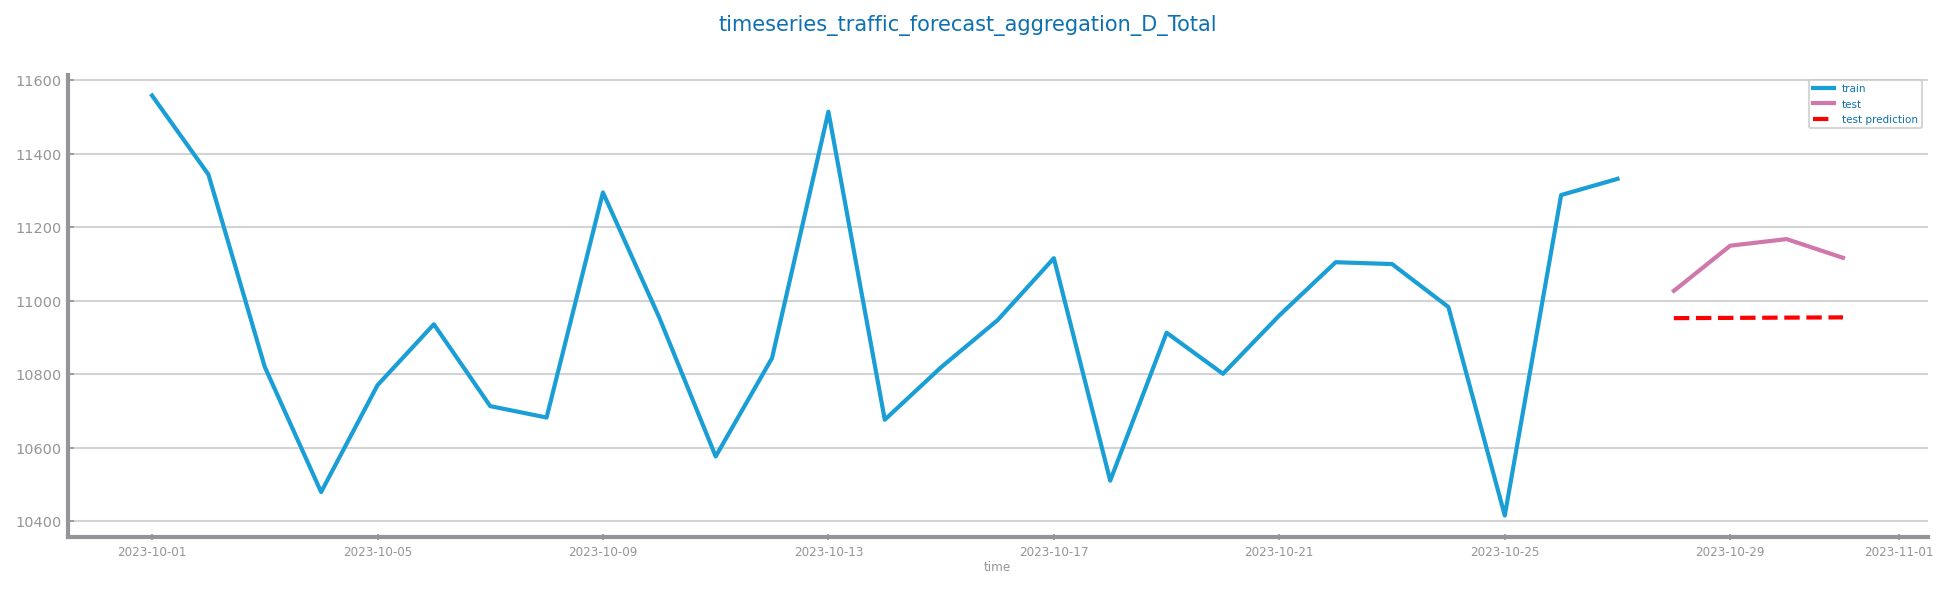

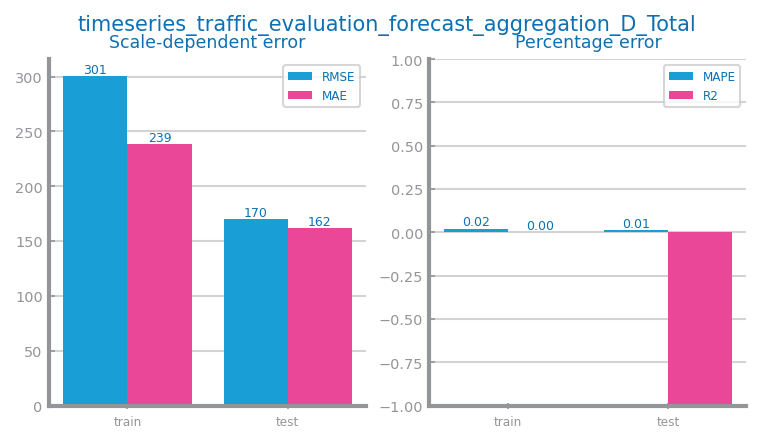

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dslabs_functions import series_train_test_split
import pandas as pd
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT, plot_forecasting_series, plot_forecasting_eval
from matplotlib.pyplot import subplots
import numpy as np


file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
granularities=["S", "H", "D"]
fig, axs = subplots(len(granularities), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(granularities)))

for gran in range(len(granularities)):
    series: Series = data[target]
    series: Series = ts_aggregation_by(series, gran_level=granularities[gran], agg_func="sum")

    # Assuming 'series' is your time series data
    train_series, test_series = series_train_test_split(series)


    # Creating the predictor variable (X) - using timestamps directly
    X_train = train_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)
    X_test = test_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)

    # Reshape the target variable (y)
    y_train = train_series.values
    y_test = test_series.values
    print(y_train)
    # Initializing and fitting the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    future_timestamps = test_series.index  # Change this to your future timestamps

    # Creating a pandas Series for the forecasted values with the corresponding timestamps
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    forecast_test = pd.Series(predictions_test.flatten(), index=future_timestamps)


    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_forecasting_series(
        trn=train_series,
        tst=test_series,
        prd_tst=forecast_test,
        title=f"{file_tag}_forecast_aggregation_{granularities[gran]}_{target}",
    )
    plt.savefig(f"images/{file_tag}_forecast_aggregation_{granularities[gran]}_{target}")
    show()
    plot_forecasting_eval(
        trn=np.nan_to_num(train_series, nan=0),
        tst=test_series,
        prd_trn=predictions_train,
        prd_tst=predictions_test,
        title=f"{file_tag}_evaluation_forecast_aggregation_{granularities[gran]}_{target}"
    )
    plt.savefig(f"images/{file_tag}_evaluation_forecast_aggregation_{granularities[gran]}_{target}")
    show()


<h3>Multivariate Time Series</h3>

In [ ]:
from dslabs_functions import plot_ts_multivariate_chart

file_tag = "Consumption"
target = "Appliances"
data: DataFrame = read_csv(
    "data/time_series/appliances.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")

agg_df: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="mean")

plot_ts_multivariate_chart(
    agg_df, title=f"{file_tag} after hourly aggregation {target}"
)
show()